# Air Passenger Traffic Forecasting using Time Series

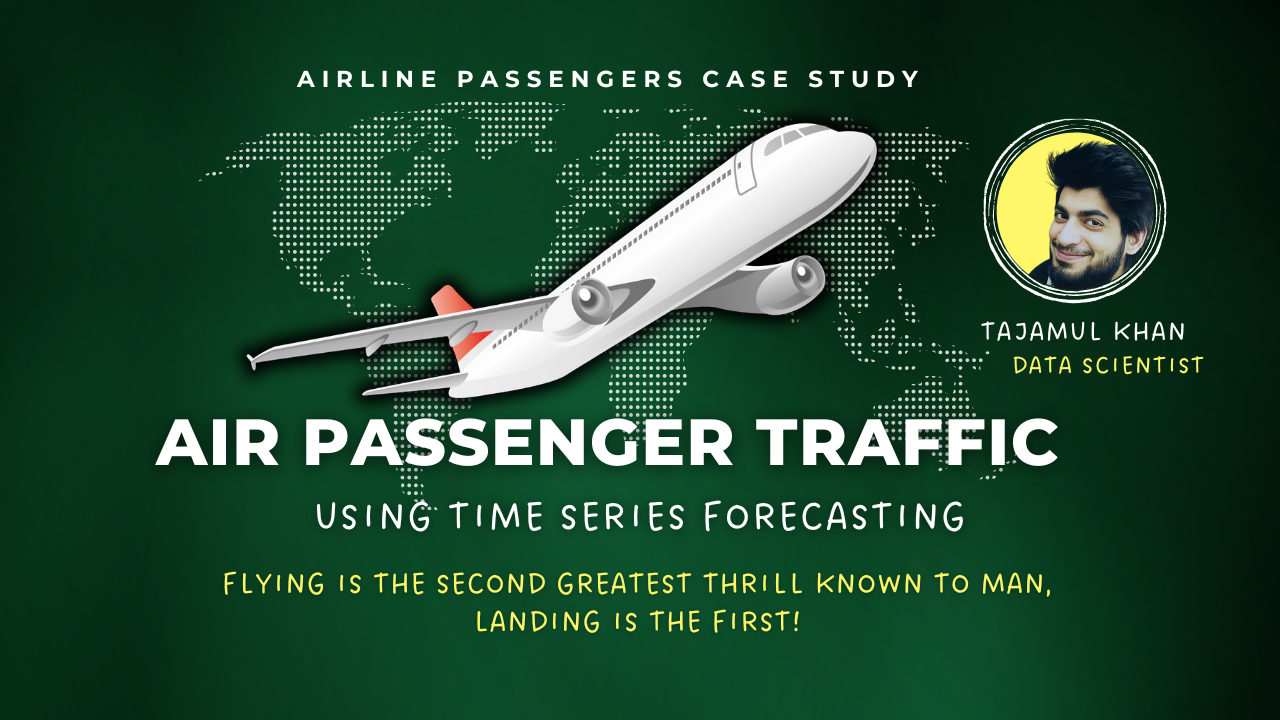

## What is Time Series

A Time Series is a series of data points indexed (or listed or graphed) in time order.

The four components of Time Series are:
1. Trend, which describe the movement along the term;
2. Seasonal variations, which represent seasonal changes;
3. Cyclical fluctuations, which correspond to periodical but not seasonal variations;
4. Irregular variations, which are other nonrandom sources of variations of series.

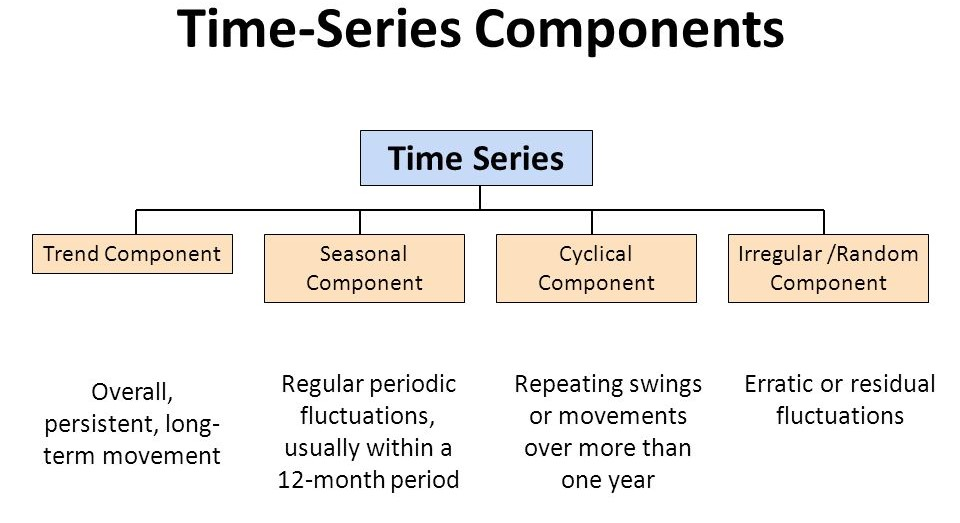

## Aim

In this project we are collecting the yearly data of the passenger number of the aeroplane and later predict the future year passenger number. In this project we forecaset the number of global air passenger journeys to increase at an average rate of 4.0% each year over the next 20 years. The number of global air passenger journeys is expected to increase at an average rate of 5.3% each year over the next 5 years.

# Getting Started

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #plt.show()
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Get the Data

In [2]:
#Data loading
data = pd.read_csv("/kaggle/input/air-passengers/AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## EDA

In [3]:
data.shape #to check the no.of rows and columns

(144, 2)

In [4]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
#changing Month Feature to DateTime Format
data['Month'] = pd.to_datetime(data['Month'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
#In Time series, date column should always be set as Index
data = data.set_index(['Month'])
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [9]:
data.shape

(144, 1)

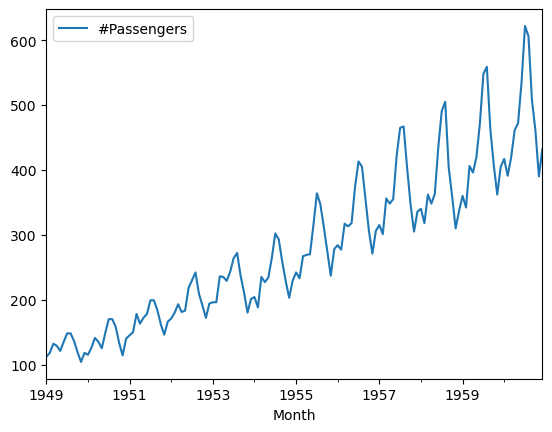

In [10]:
#Month vs Passengers plot
data.plot()
plt.show()

In the above plot, upward trend and seasonality is clearly visible.

## Data Stationary Tests before Transformation

Lets check if the data is stationary or not

### 1. Adfuller Test

In [11]:
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(data)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

# print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,0.8153688792060655
p-value=0.9918802434376413
n_lags,13
The series is not stationary


### 2. KPSS Test  (*optional*)

In [12]:
# # KPSS test - if p<0.05 - data is not stationary
# from statsmodels.tsa.stattools import kpss
# def kpss_test(series, **kw):    
#     statistic, p_value, n_lags, critical_values = kpss(series, **kw)
#     # Format Output
#     print(f'KPSS Statistic: {statistic}')
#     print(f'p-value: {p_value}')
#     print(f'num lags: {n_lags}')
#     print('Critial Values:')
#     for key, value in critical_values.items():
#         print(f'   {key} : {value}')
#     print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

# kpss_test(data)

**Test Conclusion**
After performing stationary tests, we conclude data is not stationary. So, it becomes important to station our data before we can analyze it further

## Visualization

**Seasonal decompose** - it plots the trend, Seasonal, Residual sepreately

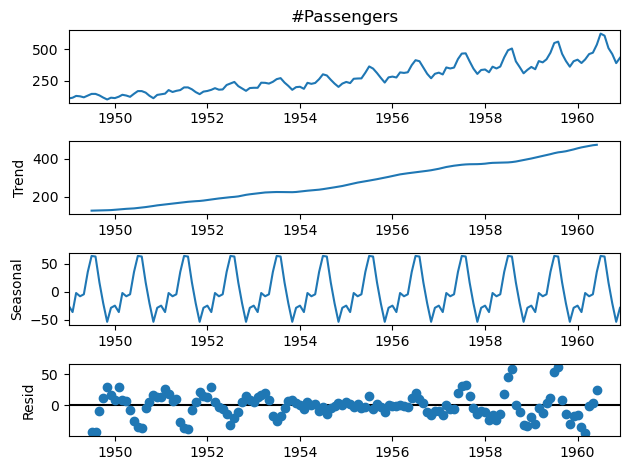

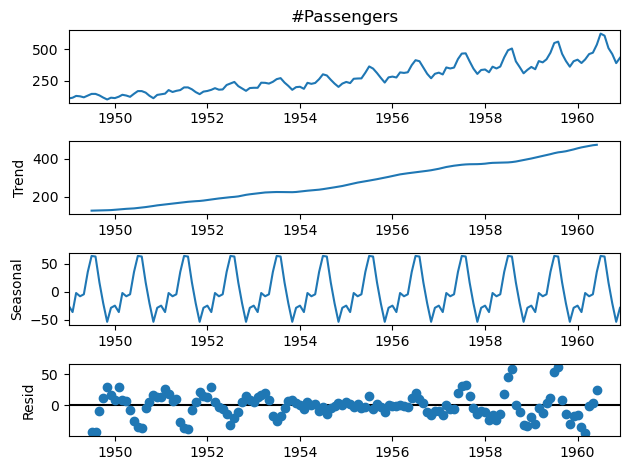

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['#Passengers'])
decomposition.plot()

**Rolling Statistics** 

Rolling is a very useful operation for time series data. Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.

In [14]:
#Rolling stats - to plot the mean and STD
rolling_mean_data= data.rolling(window=12).mean()
rolling_std_data= data.rolling(window=12).std()

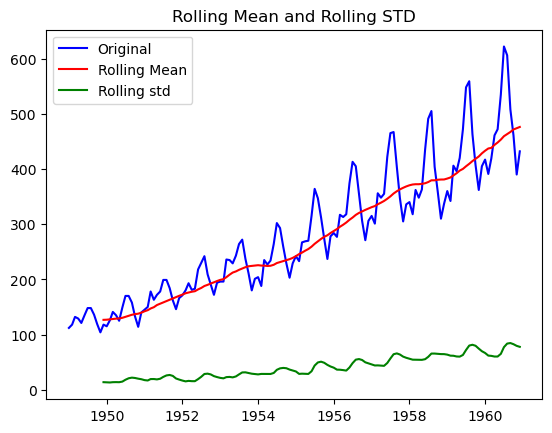

In [15]:
#Lets plot the rolling mean and rolling std
plt.plot(data,color='blue',label='Original')
plt.plot(rolling_mean_data,color='red',label='Rolling Mean')
plt.plot(rolling_std_data,color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling STD')
plt.show()

From the above graph, we see that rolling mean itself has a trend component even though rolling standard deviation is fairly constant with time. 
For our time series to be stationary, we need to ensure that both the rolling statistics ie: mean & std. dev. remain time invariant or constant with time. Thus the curves for both of them have to be parallel to the x-axis, which in our case is not so.

## Transformations

In [16]:
#applying log transformation on our data
first_log = np.log(data)

In [17]:
#dropping null values
first_log = first_log.dropna()

In [18]:
first_log

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [19]:
#Rolling stats - mean and std of log transformed data
mean_log=first_log.rolling(window=12).mean()
std_log=first_log.rolling(window=12).std()

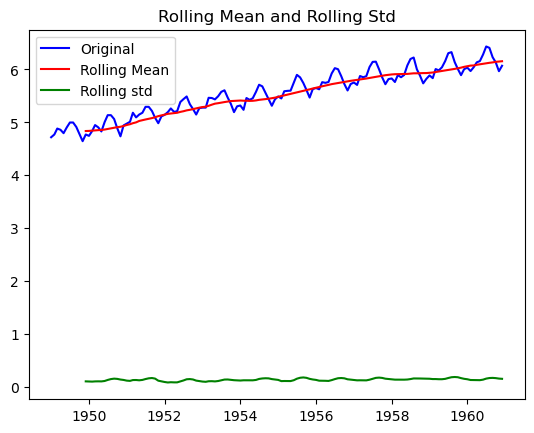

In [20]:
#Lets plot the rolling mean and rolling std of log transformed data
plt.plot(first_log,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [21]:
#Taking best data i.e., between log_data and mean_log data
new_data = first_log - mean_log
new_data = new_data.dropna()

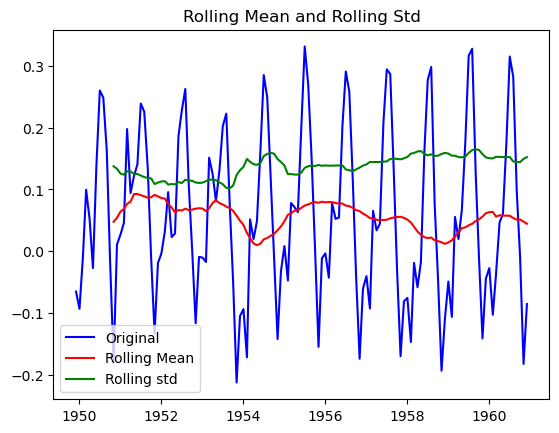

In [22]:
#Rolling stats - to plot the mean and std
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

#Lets plot the rolling mean and rolling std
plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='green',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

## Data Stationary Test after Transformation

Lets check if the data is stationary or not

In [23]:
#To check the data is stationary or not
#Ad fuller
#f- format while print statement is used

from statsmodels.tsa.stattools import adfuller

#ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(new_data)
print(f'ADF Statistic,{result[0]}') #some default value based upon the critial values
print(f'p-value={result[1]}')
print(f'n_lags,{result[2]}') #previous no.of observations used for prediction

#print(f'Result: The series is {"not " if result[1]>0.05 else ""}stationary')

if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

ADF Statistic,-3.1629079913008704
p-value=0.022234630001243053
n_lags,13
series is stationary


Finally, our data is stationary

**Original Data vs Transformed Data**

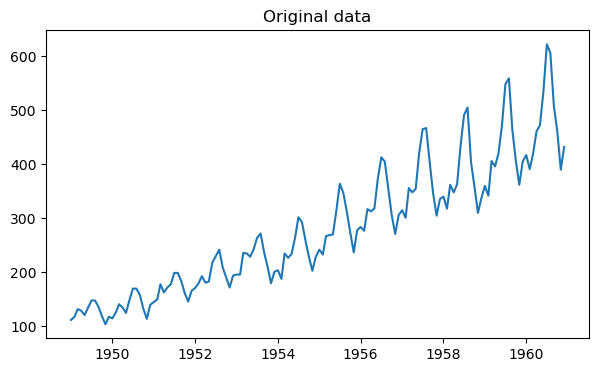

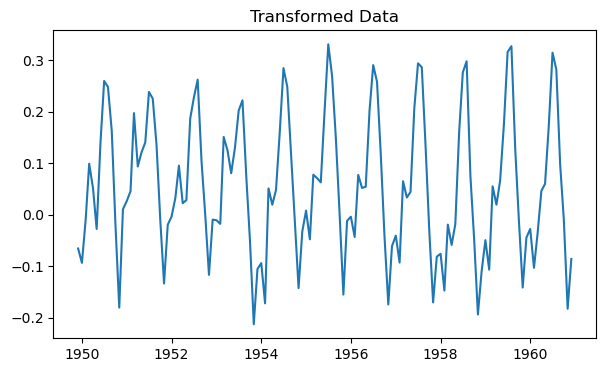

In [24]:
fig= plt.subplots(figsize=(7,4))
plt.plot(data);
plt.title('Original data');
fig= plt.subplots(figsize=(7,4))
plt.plot(new_data)
plt.title('Transformed Data');

## Model Building

### ARIMA

Auto Regressive Integrated Moving Average ARIMA is a method for forecasting or predicting future outcomes based on a historical time series.

ARIMA models use differencing to convert a non-stationary time series into a stationary one, and then predict future values from historical data.

These models use “auto” correlations and moving averages over residual errors in the data to forecast future values.

An ARIMA model has three component functions: AR (p), the number of lag observations or autoregressive terms in the model; I (d), the difference in the nonseasonal observations; and MA (q), the size of the moving average window.

* p - Partial Autocorrelation Function (PACF)
* d - Differencing
* q - Autocorrelation Function (ACF)

In [25]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

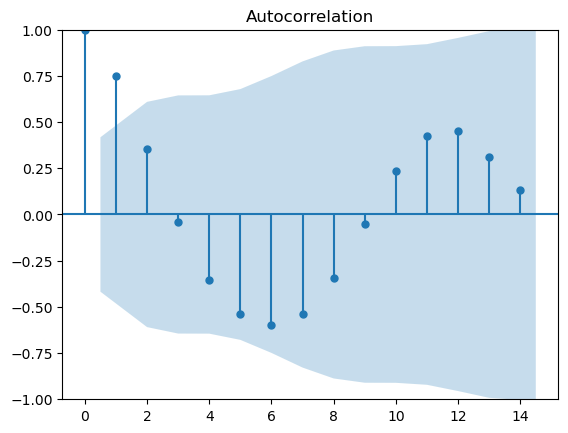

In [26]:
acf_plot=acf(new_data.dropna()) #Gradual decrease and previuous point to that - q(2)
plot_acf(acf_plot); 

In [27]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

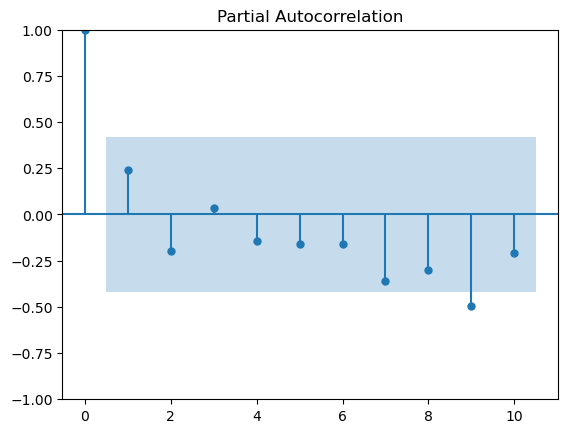

In [28]:
pacf_plot=pacf(new_data.dropna()) #the data point or lag where there is a sudden shut-off - p(1)
plot_pacf(pacf_plot,lags=10);

In [29]:
#Train Test Split
train=new_data.iloc[:120]['#Passengers']
test=new_data.iloc[121:]['#Passengers']

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model = ARIMA(train,order=(1,1,2))
model_fit=model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


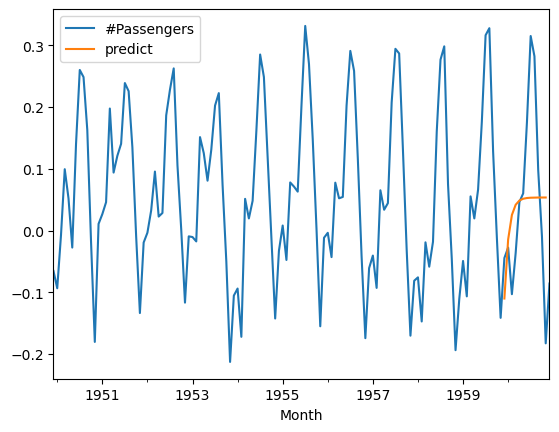

In [32]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
new_data[['#Passengers','predict']].plot();

### Auto ARIMA

For Checking best parameters for ARIMA

In [33]:
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.8 MB/s eta 0:00:00


In [34]:
import pmdarima as pm

model = pm.auto_arima(new_data['#Passengers'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=-414.584, Time=0.96 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-152.169, Time=0.10 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-312.940, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-133.698, Time=0.07 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-236.028, Time=0.42 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-413.734, Time=1.93 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=-413.957, Time=2.07 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.72 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=-410.565, Time=3.33 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-476.233, Time=1.43 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-324.579, Time=0.51 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : 

### SARIMAX

Seasonal Auto-Regressive Integrated Moving Average with eXogenous factors, or SARIMAX, is an extension of the ARIMA class of models. 

SARIMAX is used on data sets that have seasonal cycles. The difference between ARIMA and SARIMAX is the seasonality and exogenous factors (seasonality and regular ARIMA don't mix well).

Overall, ARIMA is a very decent type of models. However, the problem with this vanilla version is that it cannot handle seasonality — a big weakness. Comes SARIMA — the predecessor of SARIMAX. One shorthand notation for SARIMA models is:

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
model=SARIMAX(train,order=(1,1,2),seasonal_order=(1,1,2,12))
model=model.fit();

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59355D+00    |proj g|=  2.78591D+00

At iterate    5    f= -1.62753D+00    |proj g|=  6.98203D+00

At iterate   10    f= -1.67349D+00    |proj g|=  2.38911D-01

At iterate   15    f= -1.67938D+00    |proj g|=  5.25736D-01

At iterate   20    f= -1.68049D+00    |proj g|=  6.34050D-02

At iterate   25    f= -1.68049D+00    |proj g|=  8.90330D-03

At iterate   30    f= -1.68050D+00    |proj g|=  2.11027D-02

At iterate   35    f= -1.68050D+00    |proj g|=  3.34766D-02

At iterate   40    f= -1.68051D+00    |proj g|=  1.41093D-02

At iterate   45    f= -1.68051D+00    |proj g|=  3.54771D-03

At iterate   50    f= -1.68052D+00    |proj g|=  1.69872D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


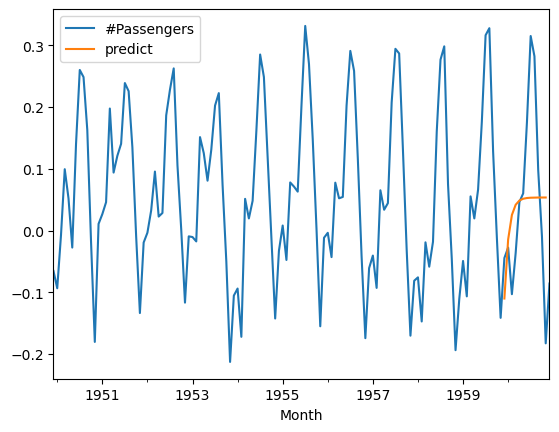

In [37]:
predict =model.predict(start=len(train), end=len(train)+len(test)-1)
new_data[['#Passengers','predict']].plot();

**Forecasting**: for predicting furture

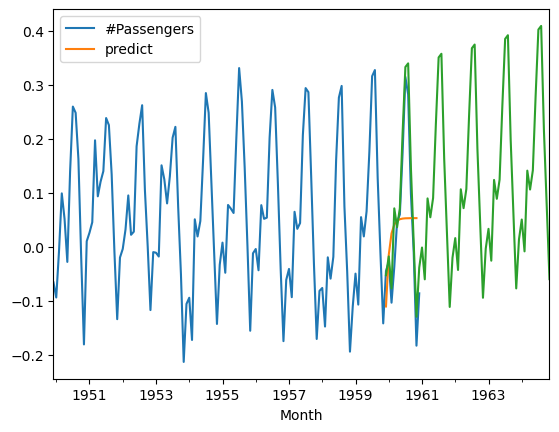

In [38]:
#for predicting furture
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot();

## Conclusion
Training has been done with an ARIMA model. Techniques like moving average and differencing were used to convert the available time series into a stationary time series. ACF and PACF was plotted and the appropriate values of p, d and q for ARIMA were found. The final forecasting shows increase in passengers in coming 5 Years.